# Bayesian Machine Scientist

## Basic Example

The following simple example shows out-of-the-box functionality of BMS

In [ ]:
# Uncomment the following line when running on Google Colab
# !pip install autora

After importing the necessary modules,

In [1]:
from autora.theorist.bms import BMSRegressor, get_priors
import numpy as np
import matplotlib.pyplot as plt

we begin by generating data with a ground-truth equation, $y = \sin(x) + x^3$.

Let's generate a simple data set with two features $x_1, x_2 \in [0, 1]$ and a target $y$. We will use the following generative model:
$y = 2 x_1 - e^{(5 x_2)}$

In [3]:
x = np.expand_dims(np.linspace(start=-1, stop=1, num=500), 1)
y = np.power(x, 3) + np.sin(x)

Now let us choose a prior over the primitives. In this case, we will use priors determined by Guimerà et al (2020).


In [7]:
# priors = get_priors("Guimera2020")


## Set up the BMS Regressor

We will use the BMS Regressor to predict the outcomes. There are a number of parameters that determine how the architecture search is performed. The most important ones are listed below:

- **`epochs`**: The number of epochs to run BMS. This corresponds to the total number of equation mutations - one mcmc step for each parallel-tempered equation and one tree swap between a pair of parallel-tempered equations.
- **`prior_par`**: A dictionary of priors for each operation. The keys correspond to operations and the respective values correspond to prior probabilities of those operations. The model comes with a default.
- **`ts`**: A list of temperature values. The machine scientist creates an equation tree for each of these values. Higher temperature trees are harder to fit, and thus they help prevent overfitting of the model.


Let's use the same priors over primitives that we specified on the previous page as well as an illustrative set of temperatures to set up the BMS regressor with default parameters.


In [4]:
temperatures = [1.0] + [1.04**k for k in range(1, 20)]

#primitives = {
#    "Psychology": {
#        "addition": 5.8,
#        "subtraction": 4.3,
#        "multiplication": 5.0,
#        "division": 5.5,
#    }
# }

bms_estimator = BMSRegressor(
    epochs=500,
    # prior_par=priors,
    ts=temperatures,
)

Now we have everything to fit and verify the model.

In [5]:
bms_estimator.fit(x,y)
y_pred = bms_estimator.predict(x)

/Users/benwandrew/Developer/autora-theorist-bms/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
INFO:autora.theorist.bms.regressor:BMS fitting started
/Users/benwandrew/Developer/autora-theorist-bms/venv/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
  0%|          | 0/500 [00:00<?, ?it/s]/Users/benwandrew/Developer/autora-theorist-bms/src/autora/theorist/bms/mcmc.py:1253: RuntimeWarning: overflow encountered in exp
  float(nif) * omegai * sf * np.exp(-dEB / self.BT - dEP / self.PT)
<lambdifygenerated-63>:2: RuntimeWarning: invalid value encountered in power
  return X0**_a0_
  0%|          | 1/500 [00:00<04:01,  2.06it/s]<lam

## Troubleshooting

We can troubleshoot the model by playing with a few parameters:

- Increasing the number of epochs. The original paper recommends 1500-3000 epochs for reliable fitting. The default is set to 1500.
- Using custom priors that are more relevant to the data. The default priors are over equations nonspecific to any particular scientific domain.
- Increasing the range of temperature values to escape local minima.
- Reducing the differences between parallel temperatures to escape local minima.


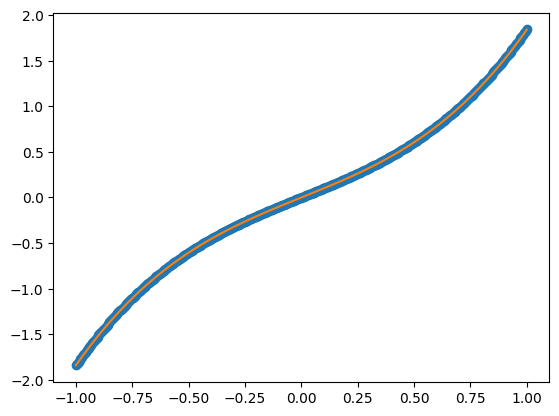

In [6]:
# plot out the ground truth versus predicted responses
plt.figure()
plt.plot(x, y, "o")
plt.plot(x, y_pred, "-")
plt.show()